In [2]:
from utils.database.lance_db import get_lance, get_lance_table

In [3]:
songs_lyrics_table=get_lance_table("songs")

In [32]:
songs_lyrics_table_df=songs_lyrics_table.search().select(["lyrics","song_name"])

In [33]:
songs_lyrics_table_df=songs_lyrics_table_df.to_df()

C:\Users\bored\AppData\Local\Temp\ipykernel_29076\819007101.py:1: UnsupportedWarning: to_df is unsupported as of 0.4.0. Use to_pandas() instead
  songs_lyrics_table_df=songs_lyrics_table_df.to_df()


In [34]:
songs_lyrics_table_df

,lyrics,song_name
0,అల్లంత దూరాల ఆ తారక\nకళ్ళెదుట నిలిచిందా ఈ...,Allantha_Doorala
1,మనసా మన్నించమ్మా\nమార్గం మళ్ళించమ్మా\nనీతో ...,Manasa_Manninchavamma
2,మనసైన నా ప్రియా కలిగేనా నీ దయా\nకలలతో కల...,Manasaina
3,ఆ ఆ ఆ\nప్రియురాలి అడ్రస్ ఏమిటో చెప్పమ్మా ...,Priyuraali
4,యు రాక్ మై,Nuvvunte
...,...,...
570,ఎవ్వారినెప్పుడు తానా వలలో\nబంధిస్తుందో ఈ ప...,Evvarineppudu
571,,Lyricist:
572,,Lyricist:
573,మైకం కాదిది నిన్నటి లోకం కాదిదీ\nఇవ్వాళే ...,Maikam kaadidee


In [35]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [36]:
def get_telugu_ratio(text):
    if not isinstance(text, str) or len(text) == 0: return 0
    telugu_chars = len(re.findall(r'[\u0C00-\u0C7F]', text))
    total_chars = len(re.sub(r'\s', '', text)) 
    if total_chars == 0: return 0
    return telugu_chars / total_chars

In [37]:
def get_uniqueness_ratio(text):
    if not isinstance(text, str) or len(text) == 0: return 0
    words = text.split()
    if len(words) == 0: return 0
    return len(set(words)) / len(words)

In [38]:
df=songs_lyrics_table_df.copy()

In [39]:
df['clean_text'] = df['lyrics'].astype(str).fillna('')
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['telugu_ratio'] = df['clean_text'].apply(get_telugu_ratio)
df['uniqueness_ratio'] = df['clean_text'].apply(get_uniqueness_ratio)

print("Data Description:")
print(df[['word_count', 'telugu_ratio', 'uniqueness_ratio']].describe())


Data Description:
       word_count  telugu_ratio  uniqueness_ratio
count  575.000000    575.000000        575.000000
mean   140.243478      0.890350          0.540082
std     76.130320      0.306595          0.225702
min      0.000000      0.000000          0.000000
25%    106.500000      1.000000          0.479119
50%    148.000000      1.000000          0.577381
75%    182.000000      1.000000          0.666667
max    475.000000      1.000000          1.000000


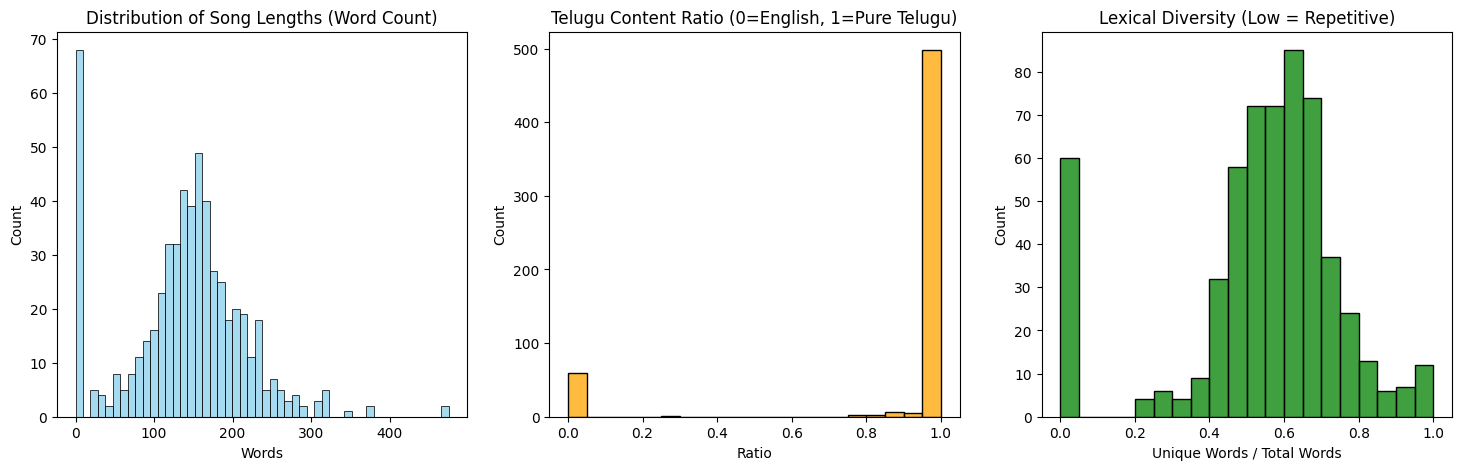

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['word_count'], bins=50, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Song Lengths (Word Count)')
axes[0].set_xlabel('Words')

sns.histplot(df['telugu_ratio'], bins=20, ax=axes[1], color='orange')
axes[1].set_title('Telugu Content Ratio (0=English, 1=Pure Telugu)')
axes[1].set_xlabel('Ratio')

sns.histplot(df['uniqueness_ratio'], bins=20, ax=axes[2], color='green')
axes[2].set_title('Lexical Diversity (Low = Repetitive)')
axes[2].set_xlabel('Unique Words / Total Words')

plt.show()

In [41]:
MIN_WORD_COUNT = 30      
MIN_TELUGU_RATIO = 0.6  
MIN_UNIQUE_RATIO = 0.2    

clean_df = df[
    (df['word_count'] >= MIN_WORD_COUNT) &
    (df['telugu_ratio'] >= MIN_TELUGU_RATIO) &
    (df['uniqueness_ratio'] >= MIN_UNIQUE_RATIO)
].copy()

def remove_non_telugu(text):
    return re.sub(r'[^\u0C00-\u0C7F\s\.\,\?\!]', '', text)

clean_df['final_lyrics'] = clean_df['clean_text'].apply(remove_non_telugu)

clean_df['final_lyrics'] = clean_df['final_lyrics']

print(f"Original Row Count: {len(df)}")
print(f"Cleaned Row Count: {len(clean_df)}")
print(f"Dropped {len(df) - len(clean_df)} bad rows.")

Original Row Count: 575
Cleaned Row Count: 502
Dropped 73 bad rows.


In [42]:
clean_df.to_csv("../../cleaneddata/sirivennela_cleaned_data.csv", index=False)

In [43]:
print(clean_df['final_lyrics'][0])

అల్లంత  దూరాల  ఆ  తారక
కళ్ళెదుట  నిలిచిందా  ఈ  తీరుగా
అరుదైన  చిన్నారిగా
కోవెల్లో  దేవేరిగా
గుండెల్లో  కొలువుండగా
భూమి  కనలేదు  ఇన్నాళ్ళుగా
ఈమెలా  వున్న  ఏ  పోలిక
అరుదైన  చిన్నారిగా
కోవెల్లో  దేవేరిగా
గుండెల్లో  కొలువుండగా
అల్లంత  దూరాల  ఆ  తారక
కళ్ళెదుట  నిలిచిందా  ఈ  తీరుగా
కన్యాదానంగా  ఈ  సంపద
చేపట్టే  ఆ  వరుడు  శ్రీహరి  కాడా
పొందాలనుకున్నా  పొందే  వీలుందా
అందరికి  అందనిదీ  సుందరి  నీడ
ఇందరి  చేతులు  పంచిన  మమత
పచ్చగ  పెంచిన  పూవులతో
నిత్యం  విరిసే  నందనమవగా
అందానికే  అందమనిపించగా
దిగి  వచ్చెనో  ఏమో  దివి  కానుక
అరుదైన  చిన్నారిగా
కోవెల్లో  దేవేరిగా
గుండెల్లో  కొలువుండగా
తన  వయ్యారంతో  ఈ  చిన్నది
లాగిందో  ఎందరిని  నిలబడనీక
ఎన్నో  ఒంపుల్తో  పొంగే  ఈ  నది
తనే  మదిని  ముంచిందో  ఎవరికి  ఎరుక
తొలి  పరిచయమొక  తీయని  కలగా
నిలిపిన  హృదయమే  సాక్షిగా
ప్రతి  జ్ఞాపకం  దీవించగా
చెలి  జీవితం  వెలిగించగా
అల్లంత  దూరాల  ఆ  తారక
కళ్ళెదుట  నిలిచిందా  ఈ  తీరుగా


In [29]:
clean_df['final_lyrics'][1]

'మనసా  మన్నించమ్మా\nమార్గం  మళ్ళించమ్మా\nనీతో  రాని  నిన్నల్లోనే\nశిలవై  ఉంటావా\nస్వప్నం  చెదిరిందమ్మా\nసత్యం  ఎదురుందమ్మా\nపొద్దే  లేని  నిద్దర్లోనే\nనిత్యం  వుంటావా\nప్రేమ  ప్రేమ  నీ  పరిచయం\nపాపం  అంటే  కాదనలేవా\nప్రేమ  ప్రేమ  నీ  పరిచయం\nపాపం  అంటే  కాదనలేవా\nప్రేమాలయంలా  వుంటే  నీ  తలపు\nప్రేమే  దైవంలా  కొలువుంటుందమ్మా\nదావానలంలా  తరిమే  నిట్టూర్పు\nప్రేమను  నీ  నుంచి  వెలివేస్తుందమ్మా\nఅంత  దూరం  ఉంటేనే\nచందురుడు  చల్లని  వెలుగమ్మ\nచెంతకొస్తే  మంటేలే\nఅందడని  నిందించొద్దమ్మా\nమన  క్షేమం  కోరుకునే\nజాబిలే  చెలిమికి  చిరునామా\nతన  సౌఖ్యం  ముఖ్యమనే\nకాంక్షలో  కలవరపడకమ్మా\nప్రేమ  ప్రేమ  నీ  స్నేహమే\nతీయని  శాపం  మన్నిస్తావా\nఒక  చినుకునైన  దాచడు  తనకోసం\nనేలకు  నీరిచ్చి  మురిసే  ఆకాశం\nనదులన్నీ  తానే  తాగే  ఆరాటం\nకడలికి  తీర్చేనా  దాహం  ఏ  మాత్రం\nపంజరంలో  బంధించి\nఆపకే  నేస్తాన్నేనాడు\nపల్లకిపై  పంపించి\nచల్లగ  దీవించవే  నేడు\nజ్ఞాపకంలో  తియ్యదనం\nచేదుగా  మార్చవ  కన్నీళ్లు\nజీవితంలో  నీ  పయనం\nఇక్కడే  ఆపకు  నూరేళ్ళు\nప్రేమ  ప్రేమ  మదిలో  భారం\nకరిగించేలా  ఓదార్చవా'

Average Vocabulary Richness: 0.59


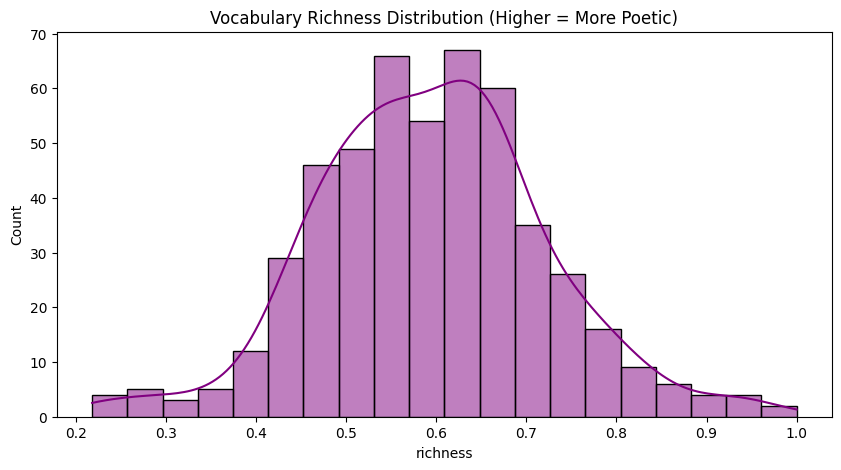

In [44]:
def calculate_richness(text):
    tokens = text.split()
    if len(tokens) < 10: return 0
    return len(set(tokens)) / len(tokens)

clean_df['richness'] = clean_df['final_lyrics'].apply(calculate_richness)

print(f"Average Vocabulary Richness: {clean_df['richness'].mean():.2f}")

plt.figure(figsize=(10, 5))
sns.histplot(clean_df['richness'], color='purple', kde=True)
plt.title('Vocabulary Richness Distribution (Higher = More Poetic)')
plt.show()

In [46]:
def avg_word_length(text):
    words = text.split()
    if not words: return 0
    return sum(len(w) for w in words) / len(words)

clean_df['complexity'] = clean_df['final_lyrics'].apply(avg_word_length)

print("top 5 Most Complex Songs")
print(clean_df.sort_values('complexity', ascending=False)[['song_name', 'complexity']].head(5))

top 5 Most Complex Songs
             song_name  complexity
446      Gunde Chatuga    7.938053
445      Gunde Chatuga    7.938053
533       Neeti Mullai    7.848485
49   Okkasari_Okkasari    7.792857
397   Neeti_Mullai_Bit    7.432432


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
def get_top_ngrams(corpus, n=2, top_k=15):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_k]

top_phrases = get_top_ngrams(clean_df['final_lyrics'], n=2)

for phrase, freq in top_phrases:
    print(f"{phrase}: {freq} times")

డక డక: 180 times
ఘల ఘల: 101 times
ఎవ వర: 79 times
ఎక కడ: 76 times
మన మన: 71 times
పద పద: 67 times
ఉన నద: 65 times
అల లర: 61 times
యయ యయ: 61 times
లమ లమ: 54 times
కళ ళల: 53 times
ఓహ ఓహ: 51 times
జర జర: 49 times
తక తక: 48 times
నమ నమ: 47 times


In [ ]:
def sanskrit_density(text):
    aspirated_chars = set("ఖఘఛఝఠఢథధఫభశషక్ష")
    count = sum(1 for char in text if char in aspirated_chars)
    total = len(re.sub(r'\s', '', text))
    if total == 0: return 0
    return count / total
clean_df['sanskrit_score'] = clean_df['final_lyrics'].apply(sanskrit_density)

Most Sanskritized Songs (Philosophy/Devotional):
             song_name  sanskrit_score
125            Khadgam        0.214822
257           Oka_Life        0.210204
327              Dosti        0.207502
314        Kanne_Paapa        0.203975
49   Okkasari_Okkasari        0.202566


In [59]:
clean_df.drop(columns=["lyrics","clean_text"],inplace=True)

In [60]:
clean_df

,song_name,word_count,telugu_ratio,uniqueness_ratio,final_lyrics,richness,complexity,sanskrit_score
0,Allantha_Doorala,111,1.0,0.711712,అల్లంత దూరాల ఆ తారక\nకళ్ళెదుట నిలిచిందా ఈ...,0.711712,6.036036,0.094030
1,Manasa_Manninchavamma,117,1.0,0.863248,మనసా మన్నించమ్మా\nమార్గం మళ్ళించమ్మా\nనీతో ...,0.863248,6.401709,0.129506
2,Manasaina,116,1.0,0.500000,మనసైన నా ప్రియా కలిగేనా నీ దయా\nకలలతో కల...,0.500000,5.551724,0.122671
3,Priyuraali,186,1.0,0.478495,ఆ ఆ ఆ\nప్రియురాలి అడ్రస్ ఏమిటో చెప్పమ్మా ...,0.478495,5.752688,0.117757
5,O_My_Brotheru,291,1.0,0.494845,యు రాక్ మై\nఓ మై బ్రదరు చెబుతా వినరో\nవన...,0.494845,4.446735,0.146059
...,...,...,...,...,...,...,...,...
568,Soniya Soniya,248,1.0,0.516129,సోనియా సోనియా\nసోనియా సోనియా\nసోనియా ఆఆ\nసో...,0.516129,5.467742,0.112094
569,Chitti Gumma,204,1.0,0.524510,చిట్టి గుమ్మా పదవే రెండు రెక్కలు కట్టుకుం...,0.524510,6.539216,0.121439
570,Evvarineppudu,74,1.0,0.581081,ఎవ్వారినెప్పుడు తానా వలలో\nబంధిస్తుందో ఈ ప...,0.581081,5.716216,0.111111
573,Maikam kaadidee,90,1.0,0.555556,మైకం కాదిది నిన్నటి లోకం కాదిదీ\nఇవ్వాళే ...,0.555556,6.400000,0.105903


In [61]:
clean_df.to_csv("../../cleaneddata/sirivennela_cleaned_data.csv", index=False)

In [62]:
db=get_lance()

In [63]:
db.create_table("clean_Lyrics",data=clean_df,mode="overwrite")

RemoteTable(telusinger-x3dtor.clean_Lyrics)